In [3]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, log_loss
from sklearn import svm #support vector machines
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from functions import *

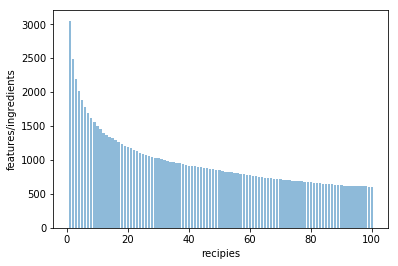

In [9]:
# First we make a list of dfs. 
# The are 39774 in total, so min_df = i/39774 means 
# include every ingredient that appears in at least i recipies.
df_list = [i/39774 for i in range(1,101)] 
feat_num = []

data = pd.read_json('train.json') 
y = data.cuisine.values
recipie_list_list = data.ingredients.values.tolist()
recipie_string_list = [" ".join(ing) for ing in recipie_list_list]
del data, recipie_list_list

for df in df_list :
    vectorizer = CountVectorizer(min_df = df)
    X = vectorizer.fit_transform(recipie_string_list)
    feat_num.append(len(vectorizer.get_feature_names()))


### Make bar charts of features    
x_pos = np.arange(1,101)    
plt.bar(x_pos, feat_num, align='center', alpha=0.5)
#plt.xticks(x_pos, x_pos)
#plt.ylabel('Usage')
#plt.title('Programming language usage')

#plt.plot(range(1,11), feat_num, "-")
plt.xlabel('recipies')
plt.ylabel('features/ingredients')
plt.show()


In [10]:
accuracies = []
clf = LogisticRegression()

for df in df_list :
    print("Testing min_df = %f" % df)
    vectorizer = CountVectorizer(min_df = df)
    X = vectorizer.fit_transform(recipie_string_list)
    # Pick the highst cv scores (avarage of fold accuracies)
    score = cross_val_score(clf, X, y, cv=3)
    accuracies.append(np.mean(score))
    print("")


Testing min_df = 0.000025

Testing min_df = 0.000050

Testing min_df = 0.000075

Testing min_df = 0.000101

Testing min_df = 0.000126

Testing min_df = 0.000151

Testing min_df = 0.000176

Testing min_df = 0.000201

Testing min_df = 0.000226

Testing min_df = 0.000251

Testing min_df = 0.000277

Testing min_df = 0.000302

Testing min_df = 0.000327

Testing min_df = 0.000352

Testing min_df = 0.000377

Testing min_df = 0.000402

Testing min_df = 0.000427

Testing min_df = 0.000453

Testing min_df = 0.000478

Testing min_df = 0.000503

Testing min_df = 0.000528

Testing min_df = 0.000553

Testing min_df = 0.000578

Testing min_df = 0.000603

Testing min_df = 0.000629

Testing min_df = 0.000654

Testing min_df = 0.000679

Testing min_df = 0.000704

Testing min_df = 0.000729

Testing min_df = 0.000754

Testing min_df = 0.000779

Testing min_df = 0.000805

Testing min_df = 0.000830

Testing min_df = 0.000855

Testing min_df = 0.000880

Testing min_df = 0.000905

Testing min_df = 0.000930

T

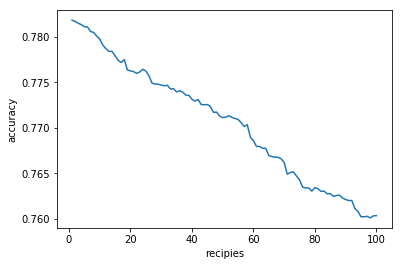

In [12]:
### Make bar charts of accuracies    
x_pos = np.arange(1,101)    
plt.plot(x_pos, accuracies)
#plt.xticks(x_pos, x_pos)
#plt.ylabel('Usage')
#plt.title('Programming language usage')

#plt.plot(range(1,11), feat_num, "-")
plt.xlabel('recipies')
plt.ylabel('accuracy')
plt.show()

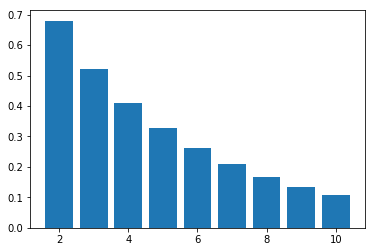

[0.6800000000000002, 0.5200000000000001, 0.41120000000000007, 0.32800000000000007, 0.2622080000000001, 0.20972800000000008, 0.1677747200000001, 0.13421824000000007, 0.10737428480000005]


In [18]:
x = [2,3,4,5,6,7,8,9,10]
prob = [(0.8**n + 0.2**n) for n in x]
plt.bar(x,prob)
plt.show()
print(prob)

In [5]:
print(clean('low-fat 3d'))

X, y, features = get_design_matrix(cleaning_function = clean, min_df = 3)
print(len(features))
print(features)

low fat d
2176
['abura', 'acai', 'accent', 'achiote', 'acid', 'acini', 'ackee', 'acorn', 'acting', 'active', 'added', 'adobo', 'adzuki', 'agar', 'agave', 'age', 'aged', 'ahi', 'aioli', 'ajinomoto', 'ajwain', 'aka', 'alaskan', 'albacore', 'alcohol', 'ale', 'aleppo', 'alfalfa', 'alfredo', 'all', 'allspice', 'almond', 'almonds', 'amaretti', 'amaretto', 'amber', 'amchur', 'american', 'aminos', 'ampalaya', 'anaheim', 'ancho', 'anchovies', 'anchovy', 'and', 'andouille', 'anejo', 'angel', 'anglaise', 'angostura', 'anise', 'anisette', 'anjou', 'annatto', 'apple', 'apples', 'applesauce', 'applewood', 'apricot', 'apricots', 'arbol', 'arborio', 'arhar', 'armagnac', 'arrowroot', 'artichok', 'artichoke', 'artichokes', 'artisan', 'arugula', 'asada', 'asadero', 'asafetida', 'asafoetida', 'asiago', 'asian', 'asparagus', 'assorted', 'atta', 'au', 'avocado', 'avocados', 'aãai', 'baby', 'back', 'bacon', 'bagels', 'bags', 'baguette', 'baileys', 'baked', 'baking', 'balance', 'balls', 'balm', 'balsamic', 'b